In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA - 1

In [58]:
df = pd.read_csv('bike_details.csv')

In [59]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [60]:
#Question 1: What is the range of selling prices in the dataset?
selling_price_range = (df['selling_price'].min(), df['selling_price'].max())
print(f"Range of Selling Prices: {selling_price_range}")

Range of Selling Prices: (5000, 760000)


In [61]:
#Question 2: What is the median selling price for bikes in the dataset?
median_selling_price = df['selling_price'].median()
print(f"Median Selling Price: {median_selling_price}")

Median Selling Price: 45000.0


In [62]:
#Question 3: What is the most common seller type?
most_common_seller_type = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {most_common_seller_type}")

Most Common Seller Type: Individual


In [63]:
#Question 4: How many bikes have driven more than 50,000 kilometers?
bikes_above_50k_km = df[df['km_driven'] > 50000].shape[0]
print(f"Bikes Driven More Than 50,000 km: {bikes_above_50k_km}")

Bikes Driven More Than 50,000 km: 170


In [64]:
#Question 5: What is the average km_driven value for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by Ownership Type:\n", avg_km_by_owner)

Average km_driven by Ownership Type:
 owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [65]:
#Question 6: What proportion of bikes are from the year 2015 or older?
proportion_old_bikes = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f"Proportion of Bikes from 2015 or Older: {proportion_old_bikes:.2%}")

Proportion of Bikes from 2015 or Older: 56.64%


In [66]:
#Question 7: What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Missing Values Across Dataset:\n", missing_values)

Missing Values Across Dataset:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [67]:
#Question 8: What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = df.loc[df['ex_showroom_price'].idxmax()]
print(f"Highest Ex-Showroom Price: {highest_ex_showroom_price['ex_showroom_price']} for {highest_ex_showroom_price['name']}")

Highest Ex-Showroom Price: 1278000.0 for Harley-Davidson Street Bob


In [68]:
#Question 9: What is the total number of bikes listed by each seller type?
bikes_by_seller_type = df['seller_type'].value_counts()
print("Total Bikes Listed by Seller Type:\n", bikes_by_seller_type)

Total Bikes Listed by Seller Type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


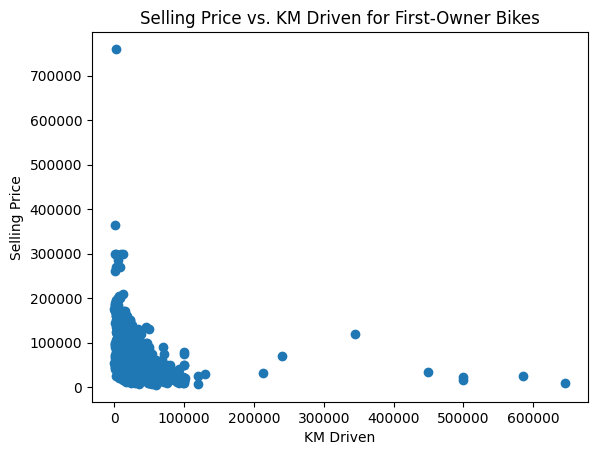

In [69]:
#Question 10: What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == '1st owner']
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'])
plt.title("Selling Price vs. KM Driven for First-Owner Bikes")
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.show()

In [70]:
#Question 11: Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Number of Rows After Removing Outliers: {df_no_outliers.shape[0]}")

Number of Rows After Removing Outliers: 1022


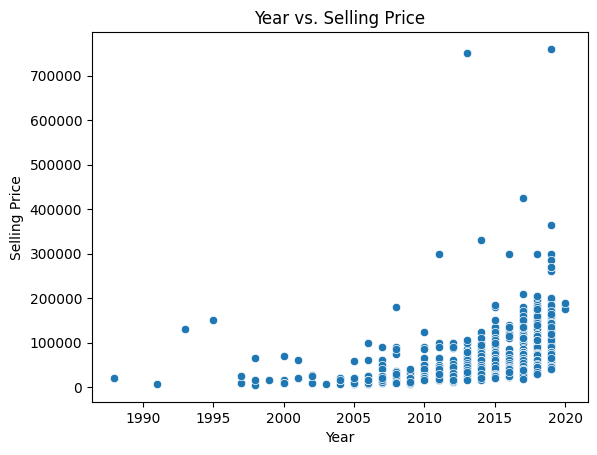

In [71]:
#Question 12: Perform a bivariate analysis to visualize the relationship between year and selling_price.
sns.scatterplot(data=df, x='year', y='selling_price')
plt.title("Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

In [72]:
#Question 13: What is the average depreciation in selling price based on the bike's age?
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['year']
avg_depreciation = df.groupby('age')['selling_price'].mean()
print("Average Depreciation by Age:\n", avg_depreciation)

Average Depreciation by Age:
 age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


In [73]:
#Question 14: Which bike names are priced significantly above the average price for their manufacturing year?
df['avg_price_by_year'] = df.groupby('year')['selling_price'].transform('mean')
expensive_bikes = df[df['selling_price'] > df['avg_price_by_year']]
print("Bikes Priced Above Average for Their Year:\n", expensive_bikes[['name', 'year', 'selling_price']])

Bikes Priced Above Average for Their Year:
                                       name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


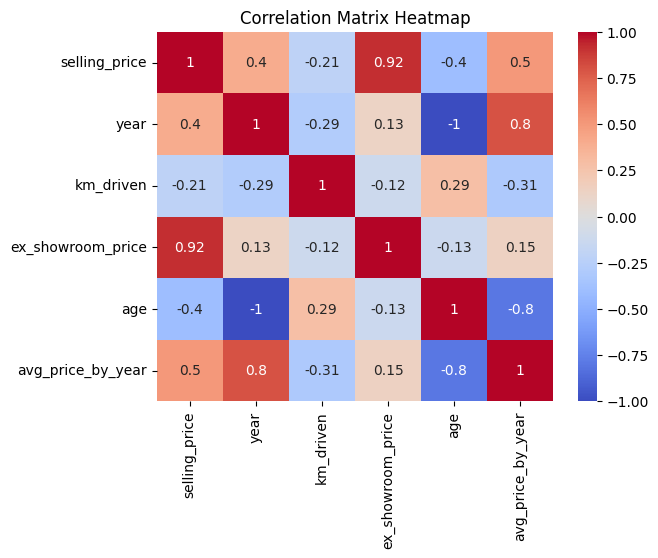

In [74]:
#Question 15: Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

#EDA - 2

In [75]:
df = pd.read_csv('car_sales.csv')

In [76]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500.0,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,SUV,8264678.0,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000.0,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,SUV,6848189.0,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000.0,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,Passenger,7298798.0,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500.0,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,SUV,6257557.0,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000.0,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,Hatchback,7081483.0,Janesville


In [77]:
#Question 1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average Selling Price by Dealer:\n", avg_price_by_dealer)

Average Selling Price by Dealer:
 Dealer_Name
U-Haul CO                                          28907.834933
Rabun Used Car Sales                               28814.595884
Iceberg Rentals                                    28738.092702
Saab-Belle Dodge                                   28400.890732
Motor Vehicle Branch Office                        28367.355212
Gartner Buick Hyundai Saab                         28311.988350
Hatfield Volkswagen                                28309.914894
Tri-State Mack Inc                                 28180.675248
Classic Chevy                                      28113.372624
C & M Motors Inc                                   28095.388350
Capitol KIA                                        28088.547389
Scrivener Performance Engineering                  28081.878049
Nebo Chevrolet                                     28078.123552
Progressive Shippers Cooperative Association No    28001.320632
Clay Johnson Auto Sales                            27981.6

In [78]:
#Question 2: Which car brand (Company) has the highest variation in prices, and what does this tell us about pricing trends?
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
highest_variation_brand = price_variation.idxmax()
print(f"Car Brand with Highest Price Variation: {highest_variation_brand}")

Car Brand with Highest Price Variation: Cadillac


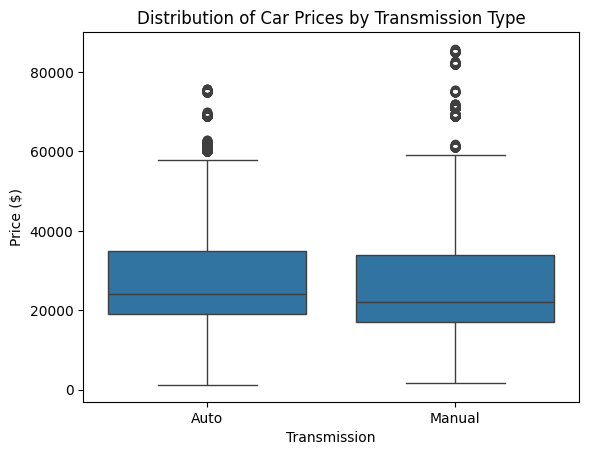

In [79]:
#Question 3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(data=df, x='Transmission', y='Price ($)')
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

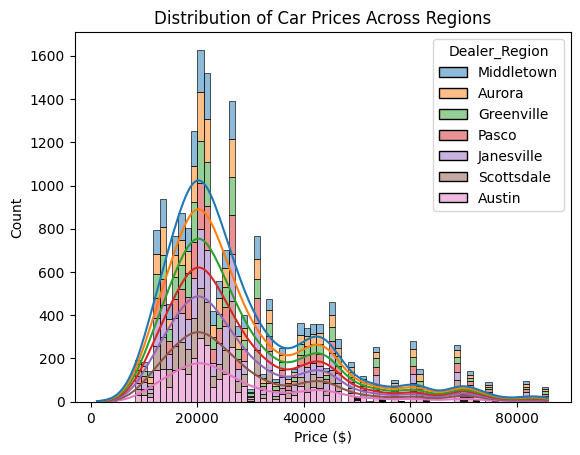

In [80]:
#Question 4: What is the distribution of car prices across different regions?
sns.histplot(data=df, x='Price ($)', hue='Dealer_Region', kde=True, multiple='stack')
plt.title("Distribution of Car Prices Across Regions")
plt.show()

Distribution of Cars by Body Style:
 Body Style
SUV          5252
Hatchback    5179
Sedan        3669
Passenger    3283
Hardtop      2262
Name: count, dtype: int64


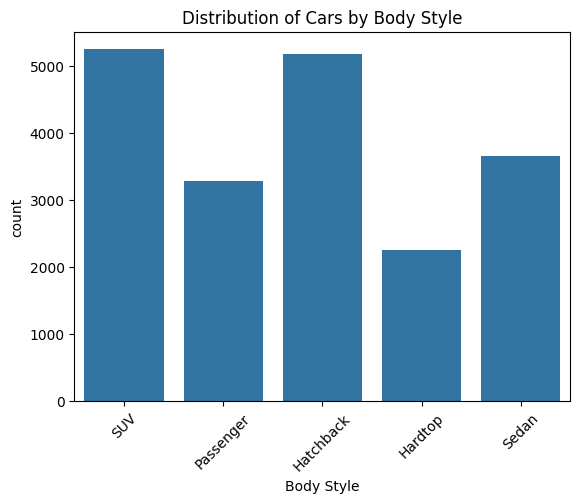

In [81]:
#Question 5: What is the distribution of cars based on body styles?
body_style_distribution = df['Body Style'].value_counts()
print("Distribution of Cars by Body Style:\n", body_style_distribution)
sns.countplot(data=df, x='Body Style')
plt.title("Distribution of Cars by Body Style")
plt.xticks(rotation=45)
plt.show()

<ipython-input-82-86c287fc24b6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()


Average Selling Price by Gender and Annual Income:
 Gender  Annual Income          
Female  (2313.5, 2250800.0]        28182.187422
        (2250800.0, 4488100.0]     30171.714286
        (4488100.0, 6725400.0]     28306.800000
        (6725400.0, 8962700.0]              NaN
        (8962700.0, 11200000.0]             NaN
Male    (2313.5, 2250800.0]        28008.616123
        (2250800.0, 4488100.0]     28980.223089
        (4488100.0, 6725400.0]     26347.702703
        (6725400.0, 8962700.0]     40333.333333
        (8962700.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


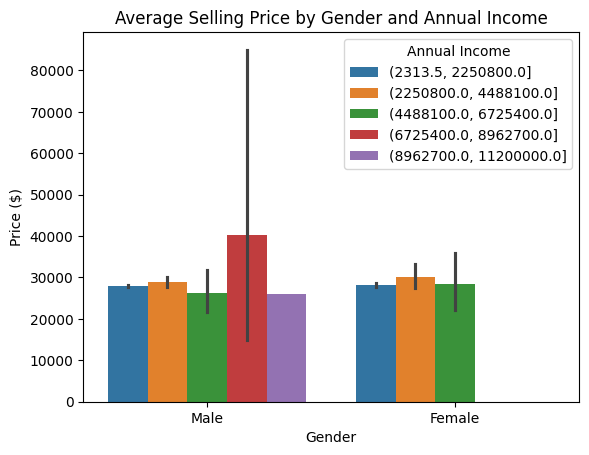

In [82]:
#Question 6: How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()
print("Average Selling Price by Gender and Annual Income:\n", avg_price_by_gender_income)
sns.barplot(data=df, x='Gender', y='Price ($)', hue=pd.cut(df['Annual Income'], bins=5))
plt.title("Average Selling Price by Gender and Annual Income")
plt.show()

Distribution of Car Prices and Sales Count by Region:
                   Price ($)      
                       mean count
Dealer_Region                    
Aurora         28234.584330  2591
Austin         28295.139159  3399
Greenville     28194.890106  2557
Janesville     27885.921431  3131
Middletown     27849.322606  2579
Pasco          28163.762238  2574
Scottsdale     27984.296375  2814


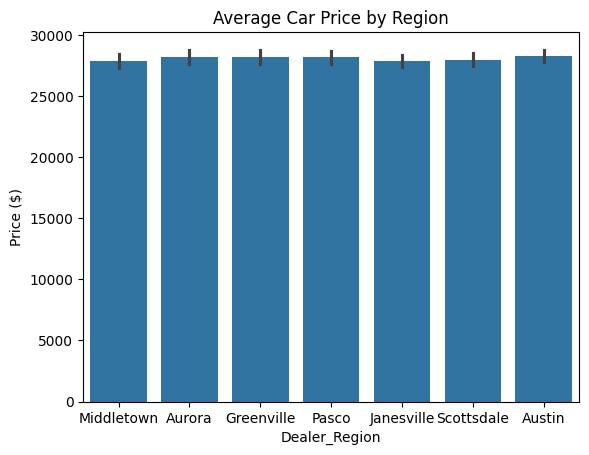

In [83]:
#Question 7: What is the distribution of car prices by region, and how does the number of cars sold vary by region?
region_stats = df.groupby('Dealer_Region').agg({'Price ($)': ['mean', 'count']})
print("Distribution of Car Prices and Sales Count by Region:\n", region_stats)
sns.barplot(data=df, x='Dealer_Region', y='Price ($)')
plt.title("Average Car Price by Region")
plt.show()

In [84]:
#Question 8: How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average Car Price by Engine Size:\n", avg_price_by_engine)

Average Car Price by Engine Size:
 Engine
DoubleÂ Overhead Camshaft    28250.806321
Overhead Camshaft            27908.129060
Name: Price ($), dtype: float64


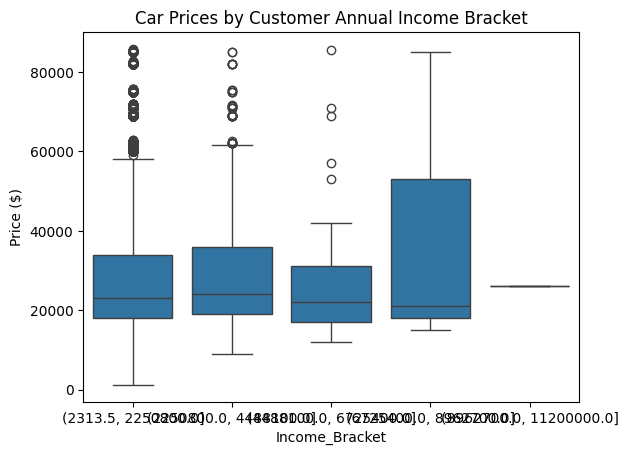

In [85]:
#Question 9: How do car prices vary based on the customer’s annual income bracket?
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=5)
sns.boxplot(data=df, x='Income_Bracket', y='Price ($)')
plt.title("Car Prices by Customer Annual Income Bracket")
plt.show()

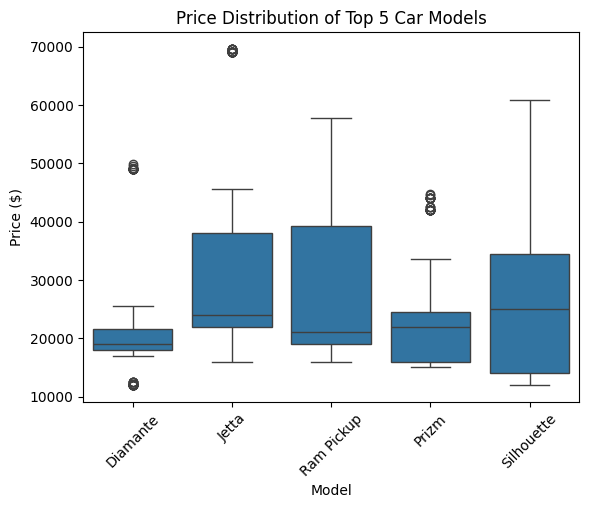

In [86]:
#Question 10: What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df['Model'].value_counts().nlargest(5).index
top_models_df = df[df['Model'].isin(top_models)]
sns.boxplot(data=top_models_df, x='Model', y='Price ($)')
plt.title("Price Distribution of Top 5 Car Models")
plt.xticks(rotation=45)
plt.show()

Average Car Price by Color and Engine Size:
 Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Color                                                   
Black                    25792.817733       31688.958278
Pale White               30419.897256       24189.488084
Red                      27461.406618       30159.219720


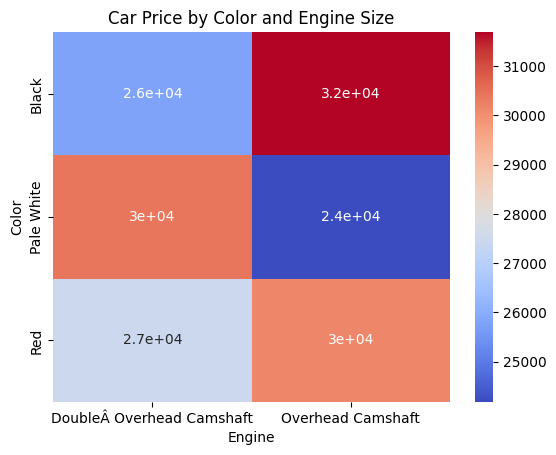

In [87]:
#Question 11: How does car price vary with engine size across different car colors, and which colors have the highest price variation?
color_engine_stats = df.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
print("Average Car Price by Color and Engine Size:\n", color_engine_stats)
sns.heatmap(color_engine_stats, annot=True, cmap='coolwarm')
plt.title("Car Price by Color and Engine Size")
plt.show()

Object `sale` not found.


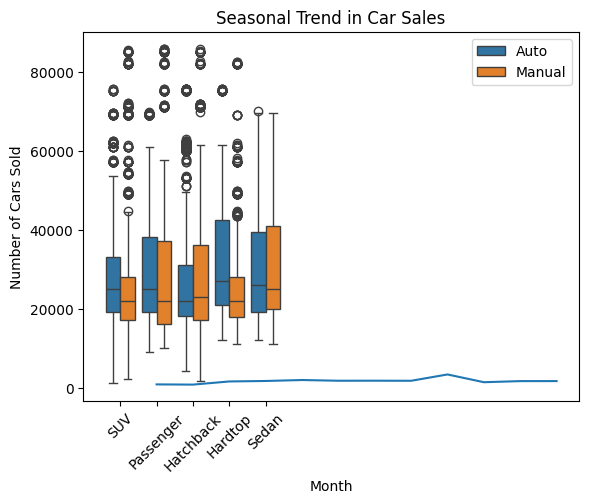

In [88]:
## Question 13: How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.show()Question 12: Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month').size()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.show()

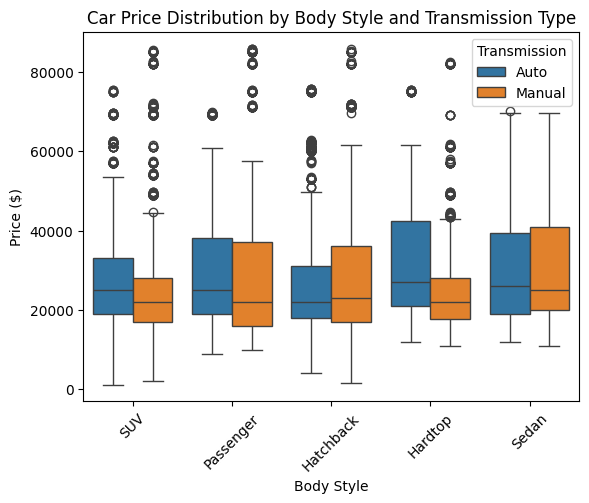

In [89]:
#Question 13: How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xticks(rotation=45)
plt.show()

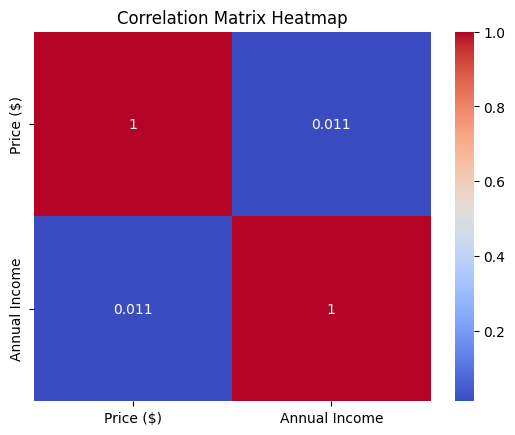

In [90]:
#Question 14: What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
numeric_columns = df[['Price ($)', 'Annual Income']]
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

Average Car Price by Model and Engine Type:
 Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37329.125874                NaN
3000GT                 22812.330645       21668.513043
300M                   21352.716418                NaN
323i                   16877.483146       21030.266667
328i                   21193.252336       38876.032258
...                             ...                ...
Viper                  32300.882716       26050.300000
Voyager                22066.866667       34561.707965
Windstar               25314.358025       17116.105263
Wrangler               21306.036145       18673.084746
Xterra                 15851.342857       31076.764706

[154 rows x 2 columns]


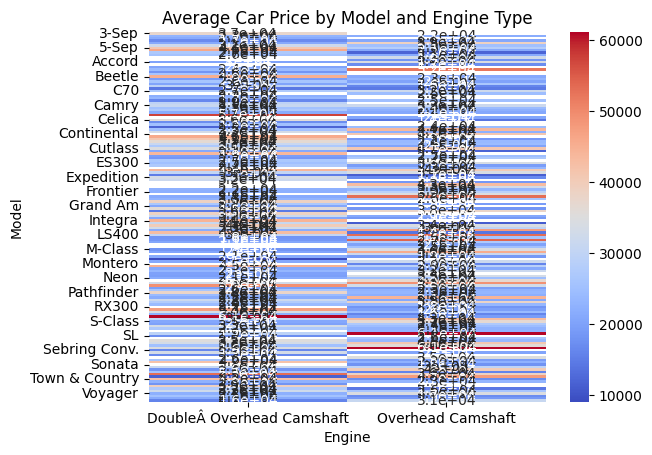

In [91]:
#Question 15: How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average Car Price by Model and Engine Type:\n", avg_price_by_model_engine)
sns.heatmap(avg_price_by_model_engine, annot=True, cmap='coolwarm')
plt.title("Average Car Price by Model and Engine Type")
plt.show()

#EDA - 3

In [92]:
df = pd.read_csv('amazon_sales_data.csv')

In [93]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [94]:
# Question 1: What is the average rating for each product category?
# Convert 'rating' column to numeric, handling errors
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Average Rating by Category:\n", avg_rating_by_category)

Average Rating by Category:
 category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Acce

In [95]:
#Question 2: What are the top rating_count products by category?
top_rated_products = df.groupby(['category', 'product_name'])['rating_count'].max().reset_index()
top_rated_products = top_rated_products.sort_values(by=['category', 'rating_count'], ascending=[True, False])
print("Top Rated Products by Category:\n", top_rated_products)

Top Rated Products by Category:
                                                category  \
0     Car&Motorbike|CarAccessories|InteriorAccessori...   
2     Computers&Accessories|Accessories&Peripherals|...   
1     Computers&Accessories|Accessories&Peripherals|...   
3     Computers&Accessories|Accessories&Peripherals|...   
4     Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1332  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1335  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1334  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1333  OfficeProducts|OfficePaperProducts|Paper|Stati...   
1336  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
0     Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
2     rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
1     Kanget [2 Pack] Type C Female to USB A 

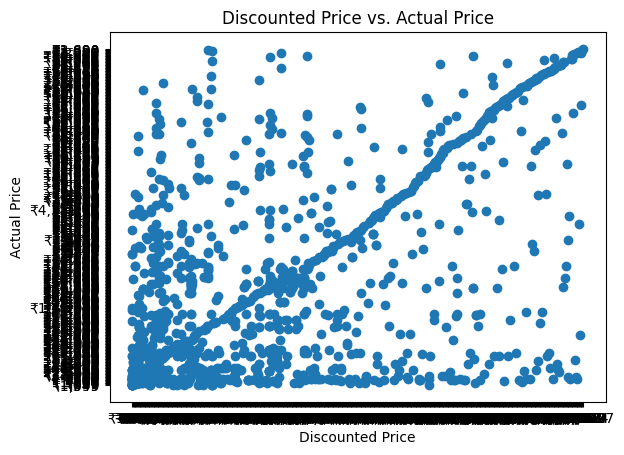

In [96]:
#Question 3: What is the distribution of discounted prices vs. actual prices?
plt.scatter(df['discounted_price'], df['actual_price'])
plt.title("Discounted Price vs. Actual Price")
plt.xlabel("Discounted Price")
plt.ylabel("Actual Price")
plt.show()

In [97]:
#Question 4: How does the average discount percentage vary across categories?
# Convert 'discount_percentage' to numeric by removing '%' and converting to float
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("Average Discount Percentage by Category:\n", avg_discount_by_category)

Average Discount Percentage by Category:
 category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerA

In [98]:
#Question 5: What are the most popular product names?
popular_products = df['product_name'].value_counts().nlargest(10)
print("Most Popular Product Names:\n", popular_products)

Most Popular Product Names:
 product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                

In [99]:
#Question 6: What are the most popular product keywords?
from collections import Counter
keywords = ' '.join(df['about_product'].dropna()).split()
keyword_counts = Counter(keywords).most_common(10)
print("Most Popular Product Keywords:\n", keyword_counts)

Most Popular Product Keywords:
 [('and', 5003), ('the', 3553), ('to', 3551), ('with', 2805), ('for', 2275), ('of', 2013), ('your', 1722), ('a', 1702), ('|', 1431), ('is', 1425)]


In [100]:
#Question 7: What are the most popular product reviews?
popular_reviews = df['review_content'].value_counts().nlargest(10)
print("Most Popular Product Reviews:\n", popular_reviews)

Most Popular Product Reviews:
 review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The pho

Correlation Matrix:
                   discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


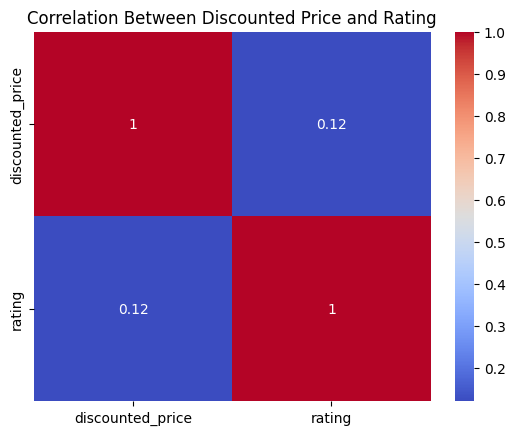

In [101]:
#Question 8: What is the correlation between discounted_price and rating?

# Convert 'discounted_price' to numeric, removing currency symbols and commas
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

correlation = df[['discounted_price', 'rating']].corr()
print("Correlation Matrix:\n", correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Between Discounted Price and Rating")
plt.show()

In [102]:
#Question 9: What are the Top 5 categories based on the highest ratings?
top_categories = df.groupby('category')['rating'].mean().nlargest(5)
print("Top 5 Categories Based on Highest Ratings:\n", top_categories)

Top 5 Categories Based on Highest Ratings:
 category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [103]:
#Question 10: Identify any potential areas for improvement or optimization based on the data analysis.
# Observations:
# - Categories with low average ratings may need improvement in product quality or customer satisfaction.
# - Products with high actual prices but low discounted prices may indicate pricing inefficiencies.
# - Categories with low review counts may benefit from better marketing or user engagement strategies.
low_rated_categories = df.groupby('category')['rating'].mean().nsmallest(5)
print("Categories with Lowest Ratings (Potential Improvement Areas):\n", low_rated_categories)

Categories with Lowest Ratings (Potential Improvement Areas):
 category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Name: rating, dtype: float64


#EDA - 4

In [106]:
df = pd.read_csv('spotify_data.csv')

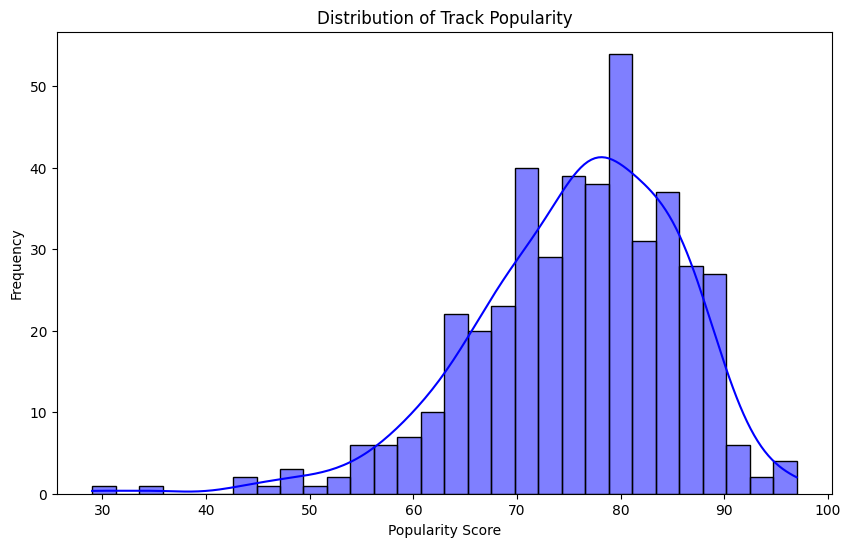

In [107]:
#Question 1: Distribution of popularity among tracks (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

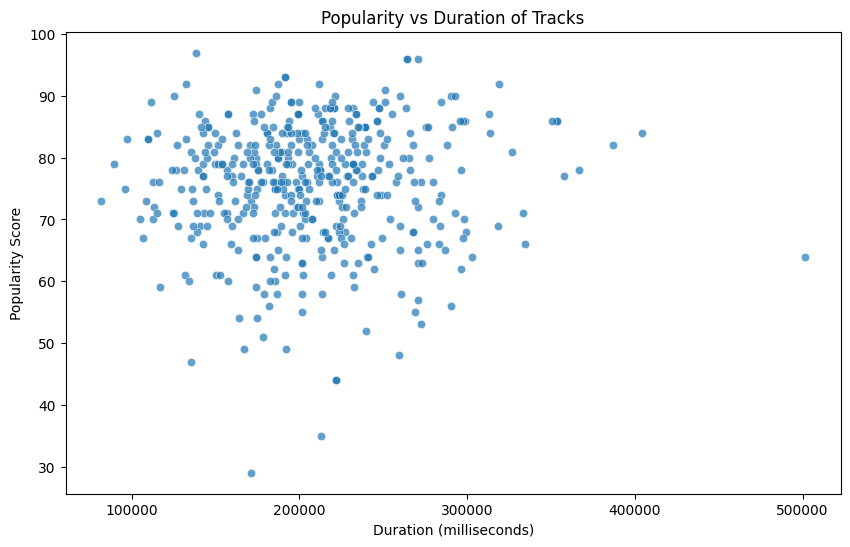

In [108]:
#Question 2: Relationship between popularity and duration (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, alpha=0.7)
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Popularity Score')
plt.show()

<ipython-input-109-da3127476bbb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', data=df, order=artist_counts.index[:10], palette='viridis')


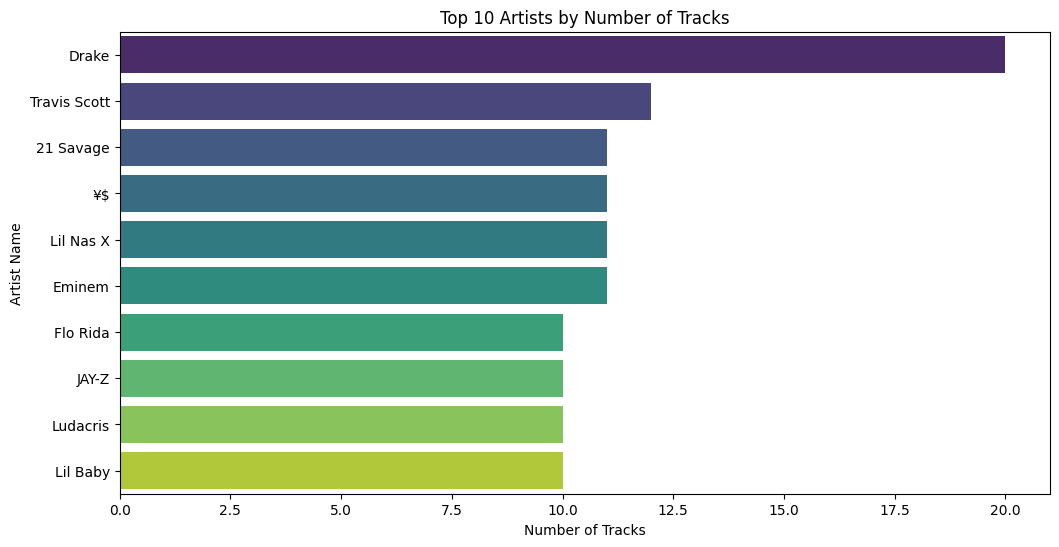

In [109]:
#Question 3: Artist with the highest number of tracks (Countplot)
artist_counts = df['Artist'].value_counts()
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df, order=artist_counts.index[:10], palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()

In [110]:
#Question 4: Top 5 least popular tracks
least_popular_tracks = df.sort_values(by='Popularity').head(5)
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [111]:
#Question 5: Average popularity of top 5 most popular artists
top_5_artists = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
print("\nAverage Popularity of Top 5 Artists:")
print(top_5_artists)


Average Popularity of Top 5 Artists:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [118]:
# Question 6: Most popular tracks of top 5 artists
top_5_artist_names = top_5_artists.index
most_popular_tracks = df[df['Artist'].isin(top_5_artist_names)].groupby('Artist')['Popularity'].idxmax()

# Use the index to select the rows from the original DataFrame
most_popular_tracks = df.loc[most_popular_tracks]

print("\nMost Popular Tracks of Top 5 Artists:")
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Most Popular Tracks of Top 5 Artists:
           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


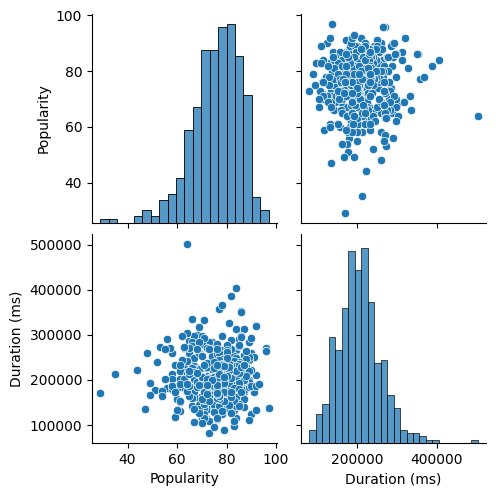

In [116]:
#Question 7: Pair plot for numerical variables
numerical_columns = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_columns])
plt.show()

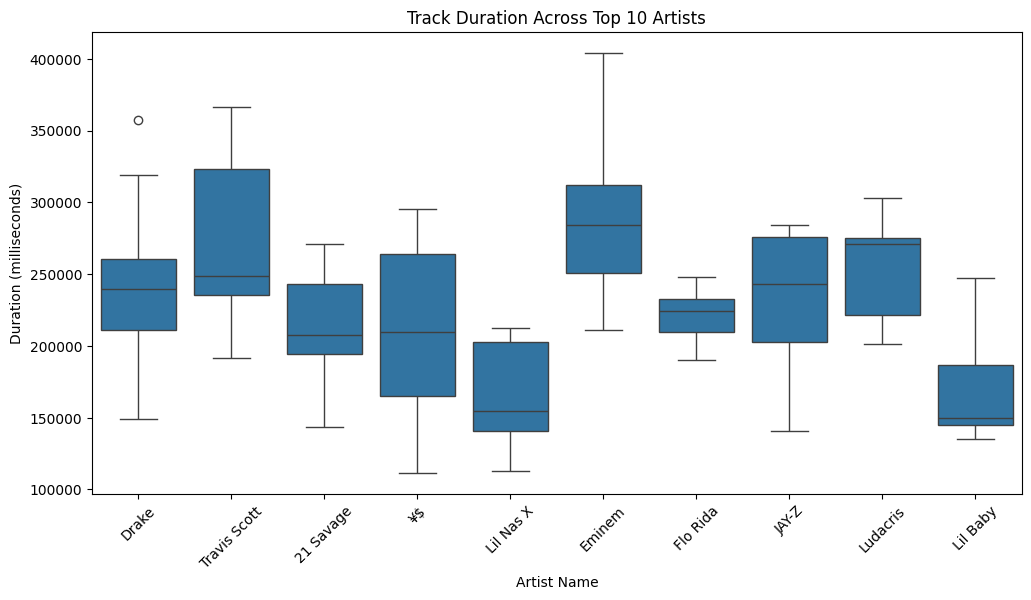

In [117]:
#Question 8: Variation in track duration across artists (Box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df, order=artist_counts.index[:10])
plt.title('Track Duration Across Top 10 Artists')
plt.xlabel('Artist Name')
plt.ylabel('Duration (milliseconds)')
plt.xticks(rotation=45)
plt.show()

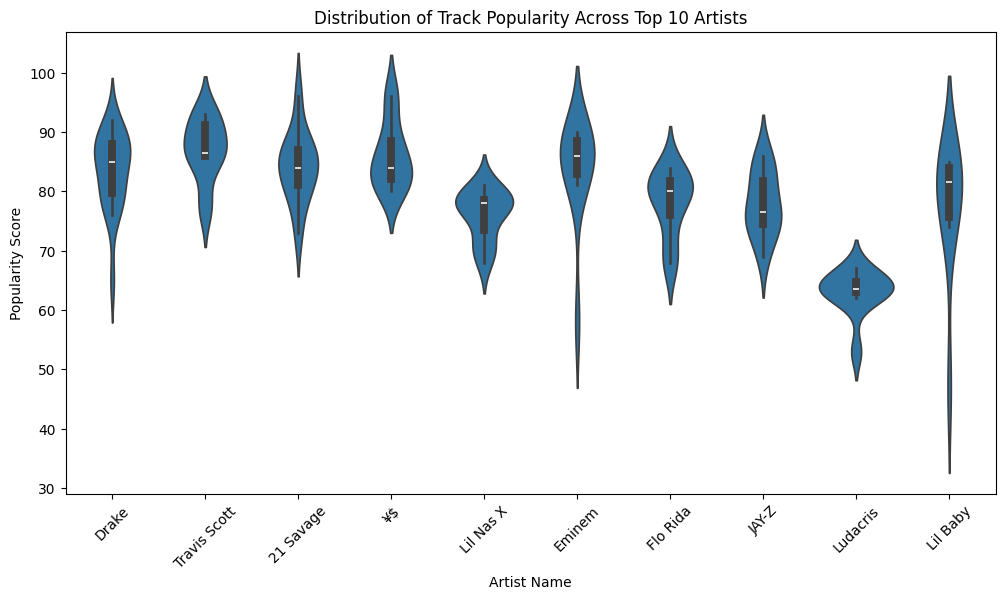

In [119]:
#Question 9: Distribution of track popularity for different artists (Violin plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df, order=artist_counts.index[:10])
plt.title('Distribution of Track Popularity Across Top 10 Artists')
plt.xlabel('Artist Name')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45)
plt.show()